# Régression linéaire avec Sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/reg_simple.csv')
df.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [3]:
df.tail()

,heure_rev,note
22,24,79
23,25,84
24,26,93
25,29,98
26,30,99


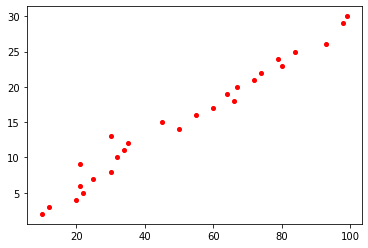

In [4]:
plt.plot(df['note'], df['heure_rev'], 'ro', markersize=4)
plt.show()

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

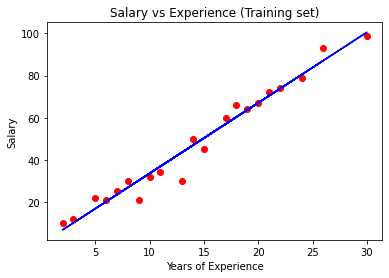

In [9]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

---

# Régression multiple avec Sklearn

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [11]:
data_house = pd.read_csv("Data/boston_house_prices.csv")

In [12]:
data_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Que signifie les abréviations ?**<br>


CRIM: Per capita crime rate by town<br>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br>
INDUS: Proportion of non-retail business acres per town<br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
NOX: Nitric oxide concentration (parts per 10 million)<br>
RM: Average number of rooms per dwelling<br>
AGE: Proportion of owner-occupied units built prior to 1940<br>
DIS: Weighted distances to five Boston employment centers<br>
RAD: Index of accessibility to radial highways<br>
TAX: Full-value property tax rate per 10,000<br>
PTRATIO: Pupil-teacher ratio by town <br>
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town <br>
LSTAT: Percentage of lower status of the population<br>
MEDV: Median value of owner-occupied homes in $1000s

In [13]:
print(data_house.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [14]:
# Vérifions qu'il n'y a pas de valeur nulle
data_house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Préparation de la data pour l'entraînement du modèle

In [15]:
X = data_house.iloc[:, :-1].values
y = data_house.iloc[:, -1].values

In [16]:
X.shape

(506, 13)

In [17]:
y.shape

(506,)

### Séparation des données entre test_set et train_set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# On peut afficher la shape des nouvelles valeurs 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Standardisation des données 

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Entraînement des modèles

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

### Visualisation 3D

In [23]:
# from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook
# fig= plt.figure()
# ax=fig.add_subplot(111,projection='3d')
# plt.xlabel("X_train[:,0]")
# plt.ylabel("y_train")
# ax.scatter(X_train[:,0],X_train[:,2],y_train)
# ax.scatter(X_train[:,0],X_train[:,2],y_pred_train,color = 'yellow')

### Evaluation du modèle

In [24]:
# On utilise RMSE et R²-score.
from sklearn.metrics import r2_score

# Evaluation du modèle (training set)

y_train_predict = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("La performance du modèle pour training set")
print("--------------------------------------")
print('RMSE est de : {}'.format(rmse))
print('R2 score est de : {}'.format(r2))
print("\n")

# Evaluation du modèle (testing set)

y_test_predict = regressor.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# Score r-squared pour le modèle
r2 = r2_score(y_test, y_test_predict)

print("La performance du modèle pour testing set")
print("--------------------------------------")
print('RMSE est de : {}'.format(rmse))
print('R2 score est de : {}'.format(r2))

La performance du modèle pour training set
--------------------------------------
RMSE est de : 4.396188144698283
R2 score est de : 0.7730135569264233


La performance du modèle pour testing set
--------------------------------------
RMSE est de : 5.783509315085131
R2 score est de : 0.5892223849182514


### Évaluez les résultats obtenus en utilisant la fonction mean_squared_error de sklearn

In [25]:
# Root Mean Square Error

from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, y_test_predict)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)


Root Mean Square Error:

5.783509315085131


# Régression polynomiale avec Sklearn

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [27]:
df = pd.read_csv("Data/Position_Salaries.csv")

df.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [28]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [29]:
#fractionner jeu de données

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [30]:
# On lance le modèle de régresion linéaire

from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg.fit(x, y)

LinearRegression()

<function matplotlib.pyplot.show(*args, **kw)>

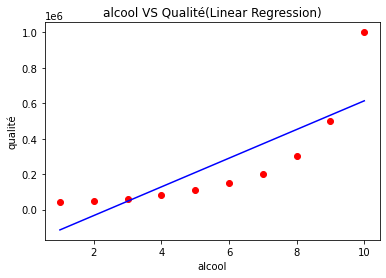

In [31]:
#On peut visualiser les données

plt.scatter(x, y, color = 'red')
plt.plot(x, Reg.predict(x), color = 'blue')
plt.title('alcool VS Qualité(Linear Regression)')
plt.xlabel('alcool')
plt.ylabel('qualité')
plt.show

In [32]:
# On lance le modèle de régression polynomiale 

poly_reg = PolynomialFeatures(degree = 3)
X_poly_train =poly_reg.fit_transform(X_train)
X_poly_test =poly_reg.fit_transform(X_test)

In [33]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression()

In [34]:
# Phase de prédiction 

y_pred = lin_reg_2.predict(X_poly_test)

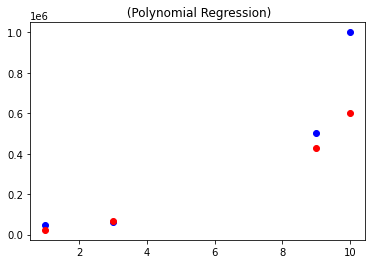

In [35]:
# Visualisation

plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'red')
plt.title(' (Polynomial Regression)')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [36]:
# Evalution du modèle avec coef de détermination avec mean squarred error

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score est de : {}'.format(r2))

R2 score est de : 0.7328866303196622


---

# Régression polynomiale avec les données "qualite_vin_rouge.csv"

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [38]:
df = pd.read_csv("Data/qualite-vin-rouge.csv")

df.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


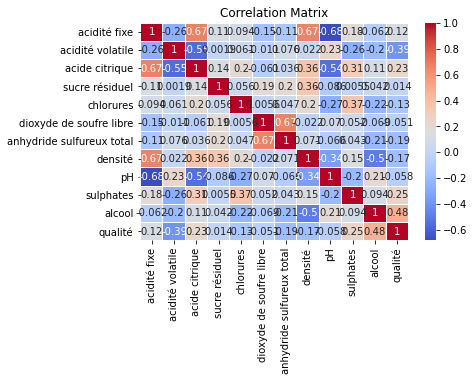

In [39]:
# matrice de corrélation

plt.title("Correlation Matrix")
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

En voyant cette image, on peut sélectionner uniquement la variable "alcool" (0,48).

In [40]:
x = np.array(df[['alcool']])
y = np.array(df[['qualité']])

In [41]:
x.shape

(1599, 1)

In [42]:
y.shape

(1599, 1)

In [43]:
#fractionner jeu de données

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

In [44]:
# On lance le modèle de régresion linéaire

from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x, y)

LinearRegression()

<function matplotlib.pyplot.show(*args, **kw)>

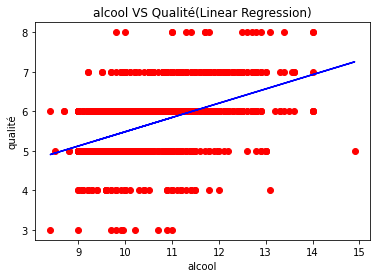

In [45]:
#On peut visualiser les données

plt.scatter(x, y, color = 'red')
plt.plot(x, LinReg.predict(x), color = 'blue')
plt.title('alcool VS Qualité(Linear Regression)')
plt.xlabel('alcool')
plt.ylabel('qualité')
plt.show

In [46]:
# On lance le modèle de régression polynomiale 

poly_reg = PolynomialFeatures(degree = 3)
X_poly_train =poly_reg.fit_transform(X_train)
X_poly_test =poly_reg.fit_transform(X_test)

In [47]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

LinearRegression()

In [48]:
# Phase de prédiction
y_pred = lin_reg_2.predict(X_poly_test) 

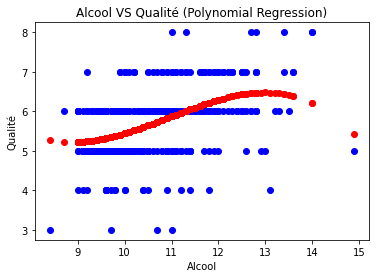

In [49]:
plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_pred, color = 'red')
plt.title('Alcool VS Qualité (Polynomial Regression)')
plt.xlabel('Alcool')
plt.ylabel('Qualité')
plt.show()

In [50]:
# Evaluation du modèle avec coef de détermination avec mean squarred error

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score est de : {}'.format(r2))

R2 score est de : 0.24679546035735556
